In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
playlist = input("Add link to playlist")

Add link to playlist/open.spotify.com/user/twgeb7mzdcv4u8h191dxrvlpc/playlist/5S8SJdl1BDc0ugpkEvFsIL?si=giraGB3PTuG9qLzYh1MX0w&dl_branch=1


In [ ]:
playlist_owner = input("Add the username of the person who created the playlist:")

Add the username of the person who created the playlist:Willis Orr


In [ ]:
pip install spotipy

In [ ]:
import spotipy
import os
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
#my current credentials to access spotify API
#Enter cid and secret for spotipy API below
cid = ''
secret = ''
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)


I created a spotify account in order to use the spotipy API. Make your own to use it.(Its free)

sp.audio_features('https://open.spotify.com/track/1D3z6HTiQsNmZxjl7F7eoG?si=9beda9f9da6e4b62')[0]['energy']

In [ ]:
#Borrowed code to get tracks from playlist(slightly edited)
def write_tracks(text_file, tracks):
    with open('playlist.txt', 'a') as file_out:
        while True:
            for item in tracks['items']:
                if 'track' in item:
                    track = item['track']
                else:
                    track = item
                try:
                    track_url = track['external_urls']['spotify']
                    file_out.write(track_url + '\n')
                except KeyError:
                    print(u'Skipping track {0} by {1} (local only?)'.format(
                            track['name'], track['artists'][0]['name']))
            # 1 page = 50 results
            # check if there are more pages
            if tracks['next']:
                tracks = sp.next(tracks)
            else:
                break


def write_playlist(username, playlist_id):
    j = playlist_id[34:]
    results = sp.user_playlist(username, j, 
                               fields='tracks,next,name')
    text_file = u'{0}.txt'.format(results['name'], ok='-_()[]{}')
    print(u'Writing {0} tracks to {1}'.format(
            results['tracks']['total'], text_file))
    tracks = results['tracks']
    write_tracks(text_file, tracks)
#For the UI: the user enters their spotify username and link of playlist here
write_playlist(playlist_owner, playlist)

with open('playlist.txt') as f:
    lines = f.readlines()
    f.close()
for i in lines:
  lines[lines.index(i)] = i[:-1]
print(lines)
os.remove('playlist.txt')

Writing 10000 tracks to The Longest Playlist on Spotify® (Official).txt
Skipping track In the Shadow of the Valley by  (local only?)
Skipping track April Sweatpants by  (local only?)
Skipping track Gee (Korean Ver. MP3 only) by SNSD (local only?)
Skipping track Hero by  (local only?)
Skipping track Beneath the Mask [With Lyrics] - Persona 5 by  (local only?)
Skipping track Last Surprise [With Lyrics] - Persona 5 by  (local only?)
Skipping track Vampire Weekend  Ottoman by  (local only?)
Skipping track Vampire Weekend - Ottoman by  (local only?)
Skipping track Father Christmas by Harry Gregson-Williams (local only?)
Skipping track To Aslan's Camp by Harry Gregson-Williams (local only?)
Skipping track Only the Beginning of the Adventure by Harry Gregson-Williams (local only?)
Skipping track Evacuating London by Harry Gregson-Williams (local only?)
Skipping track The Battle by Harry Gregson-Williams (local only?)
Skipping track I Am Not A Robot (Clock Opera Remix) by Marina & The Diamonds

In [ ]:
track_ls = lines
temp = []
for i in track_ls:
  temp.append(sp.audio_features(i)[0])
ds = pd.DataFrame(temp)
#print(ds)
uri = ds['uri']
pd.set_option("display.max_rows", 1000, "display.max_columns", None)

del ds['key']
del ds['mode']
del ds['instrumentalness']
del ds['type']
del ds['id']
del ds['track_href']
del ds['analysis_url']
del ds['duration_ms']
del ds['time_signature']
del ds['energy']
del ds['valence']
del ds['tempo']
olds = ds
print(olds.columns)
del ds['uri']

Index(['danceability', 'loudness', 'speechiness', 'acousticness', 'liveness',
       'uri'],
      dtype='object')


For n_clusters = 2, silhouette score is 0.6365472259445931)
For n_clusters = 3, silhouette score is 0.5645690943423338)
For n_clusters = 4, silhouette score is 0.5217314313346914)
For n_clusters = 5, silhouette score is 0.49397808302475865)
For n_clusters = 6, silhouette score is 0.487685939287588)
For n_clusters = 7, silhouette score is 0.4682643930384721)
For n_clusters = 8, silhouette score is 0.4593036683368927)
For n_clusters = 9, silhouette score is 0.4417914264481282)
For n_clusters = 10, silhouette score is 0.42451946214289915)
For n_clusters = 11, silhouette score is 0.4183115574933458)
For n_clusters = 12, silhouette score is 0.41692341552613704)
For n_clusters = 13, silhouette score is 0.39920106119805093)
For n_clusters = 14, silhouette score is 0.3843326476017304)


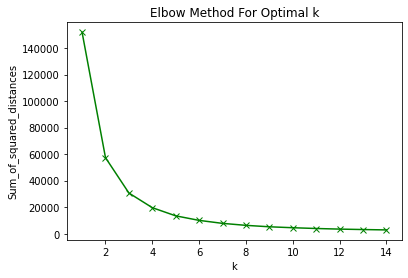

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ds)
    Sum_of_squared_distances.append(km.inertia_)

from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds)
    centers = clusterer.cluster_centers_

    score = silhouette_score (ds, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


**Emotions**
Anger, Fear - Energetic

Surprised, Happy - Happy/Cheerful

Neutral, Disgust - Chill/Calm

Sad - Sad

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(ds)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
#reducing dimensions inorder to visualize clusters
from sklearn.decomposition import PCA
ykmean = kmeans.predict(ds)
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(ds)

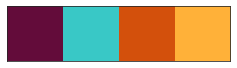

In [ ]:
import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

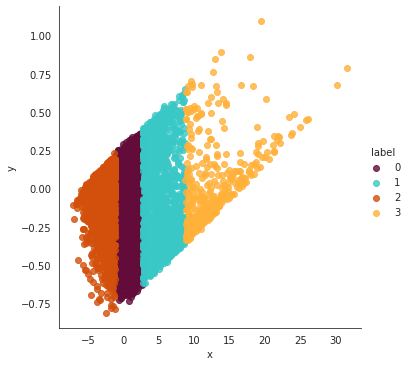

In [ ]:
pc = pd.DataFrame(principal_comp)
pc['label'] = ykmean
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

In [ ]:
print(pc)

             x         y  label
0    -1.031968  0.122521      0
1    -3.112131 -0.015127      2
2    -3.204572  0.060289      2
3    -4.108789 -0.017534      2
4     3.015041 -0.231412      1
...        ...       ...    ...
9975  4.431457  0.314445      1
9976 -2.780384  0.086527      2
9977  3.292190 -0.230871      1
9978  1.502395  0.297211      0
9979 -2.641710  0.013048      2

[9980 rows x 3 columns]


In [ ]:
pc2 = pc
pc2['URI'] = uri

pc3 = pc2.sort_values('label')

trackers = []
tracker2 = []
for i in pc2['URI']:
  trackers.append(sp.track(i)['name'])
  tracker2.append(sp.track(i)['artists'][0]['name'])

In [ ]:
pc3['name'] = trackers
pc3['artist'] = tracker2
#print(pc3)\
pc4 = pd.DataFrame()
pc4['label'] = pc3['label']
pc4['name'] = pc3['name']
pc4['artist'] = pc3['artist']
#print(pc4)
#label 0 ends at 1193
#label 1 ends at 4815
#label 2 ends at 7672

In [ ]:
energetic = pc4[pc4['label'] == 0]
calming = pc4[pc4['label'] == 1]
happy = pc4[pc4['label'] == 2]
sad = pc4[pc4['label'] == 3]
"""
for i in pc4:
  if pc4[pc4['label'] == 0]:
    mood_0['name'] = pc4['name']
    mood_0['artist'] = pc4['artist']
  elif pc4[pc4['label'] == 1]: 
    mood_1['name'] = pc4['name']
    mood_1['artist'] = pc4['artist']
  elif pc4[pc4['label'] == 2]:
    mood_2['name'] = pc4['name']
    mood_2['artist'] = pc4['artist']
  else: 
    mood_3['name'] = pc4['name']
    mood_3['artist'] = pc4['artist']
    """

"\nfor i in pc4:\n  if pc4[pc4['label'] == 0]:\n    mood_0['name'] = pc4['name']\n    mood_0['artist'] = pc4['artist']\n  elif pc4[pc4['label'] == 1]: \n    mood_1['name'] = pc4['name']\n    mood_1['artist'] = pc4['artist']\n  elif pc4[pc4['label'] == 2]:\n    mood_2['name'] = pc4['name']\n    mood_2['artist'] = pc4['artist']\n  else: \n    mood_3['name'] = pc4['name']\n    mood_3['artist'] = pc4['artist']\n    "

In [ ]:
energetic.head(50)

,label,name,artist
0,0,...Ready For It?,Taylor Swift
5263,0,Life Changes,Thomas Rhett
5259,0,24K Magic,Bruno Mars
5258,0,Galway Girl,Ed Sheeran
5256,0,Photograph,Ed Sheeran
5255,0,Havana,Camila Cabello
5254,0,When I Was Your Man,Bruno Mars
5253,0,Gonna Fly Now,Bill Conti
5264,0,Don't Wanna Know (feat. Kendrick Lamar),Maroon 5
5250,0,Thinking out Loud,Ed Sheeran


In [ ]:
calming.head(50)

,label,name,artist
5717,1,Just A Dream,Nelly
4800,1,Hey There Delilah,Plain White T's
4672,1,Candy Shop,50 Cent
658,1,There's No Way (feat. Julia Michaels),Lauv
1570,1,"Psycho, Pt. 2",Russ
2736,1,No Candle No Light (feat. Nicki Minaj),ZAYN
8329,1,Woman Like Me (feat. Nicki Minaj),Little Mix
7433,1,First Flight Home (Cover) - Original,Corbyn Besson
7481,1,Forever Young,Lil Yachty
1895,1,XO Tour Llif3,Lil Uzi Vert


In [ ]:
happy.head(50)

,label,name,artist
809,2,Someday,Nickelback
929,2,Brand New Key,Rasputina
7718,2,Coraline,Rasputina
1116,2,"Humankind, as the Sailor",Rasputina
1164,2,The 2 Miss Leavens,Rasputina
7065,2,Beware The Touch,Hannah Fury
7075,2,Sign of the Zodiac,Rasputina
1077,2,My Night Sky,Rasputina
7329,2,Love,American Authors
6896,2,On a Clear Day You Can See Forever,The Peddlers


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fc588a450>,
      dtype=object)

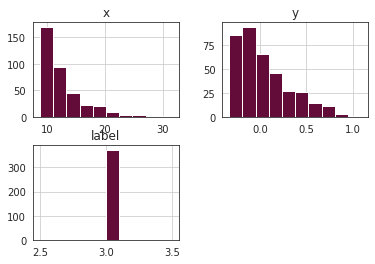

In [ ]:
pc[pc['label']==3].hist()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = ds
y = ykmean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pc4.to_csv('songs3.csv', index=False,)

NameError: ignored